<a href="https://colab.research.google.com/github/SeifAmr1/Iphone_Purchase/blob/main/ML_Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## **Loading and Preprocessing**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_csv('Iphone_purchase.csv')

# Drop the 'User ID' column
df.drop('User ID', axis=1, inplace=True)

# Preprocess the data
# Encoding categorical column 'Gender' using OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
gender_encoded = onehot_encoder.fit_transform(df[['Gender']])
gender_encoded_df = pd.DataFrame(gender_encoded, columns=['Gender_Male'])
df = pd.concat([df.drop('Gender', axis=1), gender_encoded_df], axis=1)

# Encoding categorical column 'Gender'
# labelEncoder = LabelEncoder()
# labelEncoder.fit(df["Gender"])
# df["Gender"] = labelEncoder.transform(df["Gender"])


# Splitting the data into features (X) and target variable (y)
X = df[['Gender_Male', 'Age', 'EstimatedSalary']]
y = df['Purchased']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Scaling using MinMaxScaler, normalizing balanced classes gives same accuracies
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train_smote)
X_test_normalized = scaler.transform(X_test)

# Standardize the features using StandardScaler for comparison, standardizing balanced classes gives lower accuracies
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# scaling balanced classes
scaler_smote = StandardScaler()
X_train_scaled_smote = scaler_smote.fit_transform(X_train_smote)
X_test_scaled_smote = scaler_smote.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


# **MLP Classifier**

In [ ]:
# Define the MLPClassifier
mlp = MLPClassifier(max_iter=1000)

# Define the parameter grid for hyperparameter tuning
parameter_space = {
    'hidden_layer_sizes': [(10,10), (50,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],}

# Perform GridSearchCV to find the best hyperparameters
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train_normalized, y_train_smote)

# Best parameters and best score
best_params_MLP = clf.best_params_
best_score = clf.best_score_

# Test the best MLP Classifier
mlp_best = clf.best_estimator_
mlp_predictions = mlp_best.predict(X_test_normalized)
mlp1_accuracy = accuracy_score(y_test, mlp_predictions)

print("Best MLP Classifier Accuracy (Normalized Data):", mlp1_accuracy * 100)
print("Hyperparameters for Best MLP Classifier:")
print("  - hidden_layer_sizes:", best_params_MLP['hidden_layer_sizes'])
print("  - activation:", best_params_MLP['activation'])
print("  - solver:", best_params_MLP['solver'])
print("  - alpha:", best_params_MLP['alpha'])
print("  - learning_rate:", best_params_MLP['learning_rate'])
print("Best MLP Classifier Predictions on Testing Set (Normalized Data):")
print(mlp_predictions)


# Perform GridSearchCV with standardized data
clf.fit(X_train_scaled, y_train)

# Best parameters and best score
best_params_MLP2 = clf.best_params_
best_score = clf.best_score_

# Test the best MLP Classifier
mlp_best = clf.best_estimator_
mlp_predictions = mlp_best.predict(X_test_scaled)
mlp_accuracy = accuracy_score(y_test, mlp_predictions)

print("Best MLP Classifier Accuracy (Standardized Data):", mlp_accuracy * 100)
print("Hyperparameters for Best MLP Classifier:")
print("  - hidden_layer_sizes:", best_params_MLP2['hidden_layer_sizes'])
print("  - activation:", best_params_MLP2['activation'])
print("  - solver:", best_params_MLP2['solver'])
print("  - alpha:", best_params_MLP2['alpha'])
print("  - learning_rate:", best_params_MLP2['learning_rate'])
print("Best MLP Classifier Predictions on Testing Set (Standardized Data):")
print(mlp_predictions)


Best MLP Classifier Accuracy (Normalized Data): 92.5
Hyperparameters for Best MLP Classifier:
  - hidden_layer_sizes: (50, 50)
  - activation: relu
  - solver: adam
  - alpha: 0.0001
  - learning_rate: adaptive
Best MLP Classifier Predictions on Testing Set (Normalized Data):
[1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0
 1 0 1 1 0 0]
Best MLP Classifier Accuracy (Standardized Data): 92.5
Hyperparameters for Best MLP Classifier:
  - hidden_layer_sizes: (10, 10)
  - activation: tanh
  - solver: adam
  - alpha: 0.0001
  - learning_rate: adaptive
Best MLP Classifier Predictions on Testing Set (Standardized Data):
[1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0
 1 0 1 1 0 0]


# **SVM Classifier**

In [ ]:

# Define the SVM Classifier
svm = SVC()

# Define the parameter grid for hyperparameter tuning
parameter_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svm, parameter_grid, refit=True, verbose=2, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Test the best SVM Classifier
svm_best = grid_search.best_estimator_
svm_predictions = svm_best.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print("Best SVM Classifier Accuracy:", svm_accuracy * 100)
print("Hyperparameters for Best SVM Classifier:")
print("  - C:", best_params['C'])
print("  - gamma:", best_params['gamma'])
print("  - kernel:", best_params['kernel'])
print("Best SVM Classifier Predictions on Testing Set:")
print(svm_predictions)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best SVM Classifier Accuracy: 92.5
Hyperparameters for Best SVM Classifier:
  - C: 1
  - gamma: 1
  - kernel: rbf
Best SVM Classifier Predictions on Testing Set:
[1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0
 1 0 1 1 0 0]


In [ ]:
print(best_params)


{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}


# Visualization of tuning

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


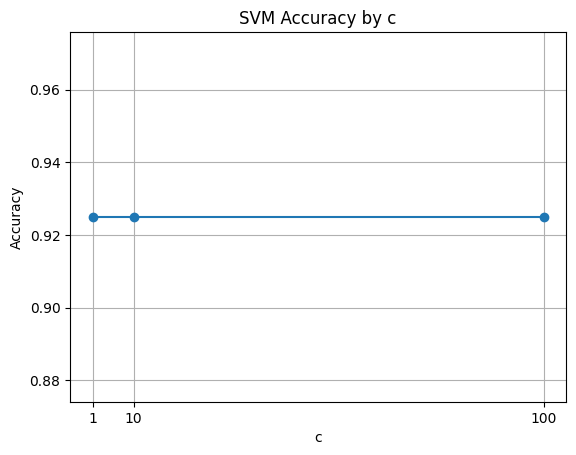

In [ ]:

# Define a range of max depth values to test
c_values = [1, 10, 100]

# Initialize an empty list to store accuracy values
c_accuracy_values = []

# Train decision tree classifiers with different max depth values
for C in c_values:
    # Initialize and train decision tree classifier
    svm = SVC(C=C, random_state=42)
    svm.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    svm_predictions = svm.predict(X_test)

    # Calculate accuracy and append to list
    c_accuracy = accuracy_score(y_test, svm_predictions)
    c_accuracy_values.append(svm_accuracy)

# Plot the relationship between max depth and accuracy
plt.plot(c_values, c_accuracy_values, marker='o')
plt.title('SVM Accuracy by c')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.xticks(c_values)
plt.grid(True)
plt.show()


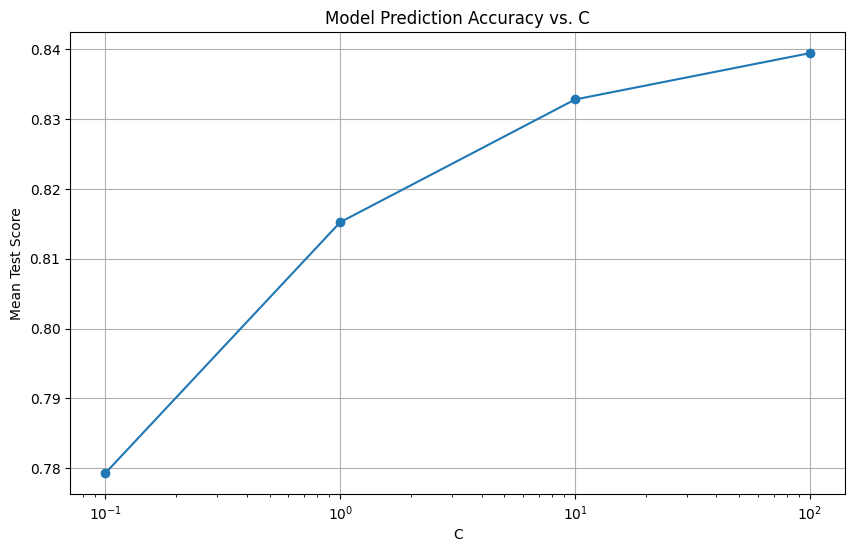

In [ ]:
import matplotlib.pyplot as plt

# Aggregate mean test scores for each unique value of C
mean_test_scores_aggregated = []
for c_value in unique_c:
    mean_test_scores_aggregated.append(np.mean([mean_test_scores[i] for i, param in enumerate(params) if param['C'] == c_value]))

# Plot accuracy vs. C
plt.figure(figsize=(10, 6))
plt.plot(unique_c, mean_test_scores_aggregated, marker='o', linestyle='-')
plt.title('Model Prediction Accuracy vs. C')
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.xscale('log')  # Use logarithmic scale for better visualization if C values are large
plt.grid(True)
plt.show()


# **Decision Tree Classifier**

In [ ]:
# Define the Decision Tree Classifier
decision_tree = DecisionTreeClassifier()

# Define the parameter grid for hyperparameter tuning
parameter_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10, 20, 30],
    'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(decision_tree, parameter_grid, refit=True, verbose=2, cv=5, n_jobs=-1)
# Decision tree performance is not affected by scaling differences so,no need to use scaled
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters and best score
best_params_DT = grid_search.best_params_
best_score = grid_search.best_score_

# Test the best Decision Tree Classifier
decision_tree_best = grid_search.best_estimator_
decision_tree_predictions = decision_tree_best.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)

print("Best Decision Tree Classifier Accuracy:", decision_tree_accuracy * 100)
print("Hyperparameters for Best Decision Tree Classifier:")
print("  - criterion:", best_params_DT['criterion'])
print("  - max_depth:", best_params_DT['max_depth'])
print("  - min_samples_split:", best_params_DT['min_samples_split'])
print("  - min_samples_leaf:", best_params_DT['min_samples_leaf'])
print("  - max_features:", best_params_DT['max_features'])
print("Best Decision Tree Classifier Predictions on Testing Set:")
print(decision_tree_predictions)


Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
Best Decision Tree Classifier Accuracy: 91.25
Hyperparameters for Best Decision Tree Classifier:
  - criterion: gini
  - max_depth: 2
  - min_samples_split: 2
  - min_samples_leaf: 1
  - max_features: None
Best Decision Tree Classifier Predictions on Testing Set:
[1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0
 1 0 1 1 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
960 fits failed out of a total of 9600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
960 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _val

# Visualization of tuning max depth hyperparameter

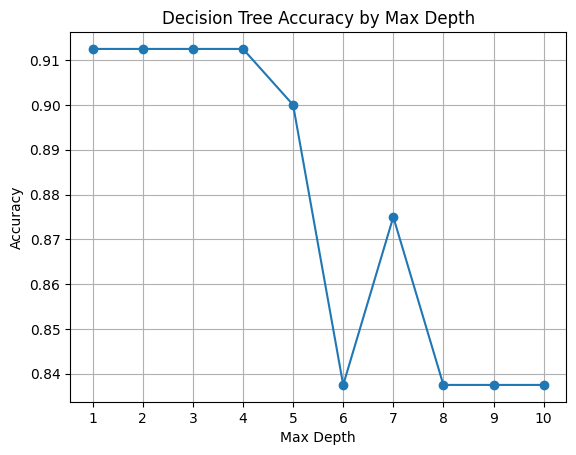

In [ ]:

# Define a range of max depth values to test
max_depth_values = list(range(1, 11))

# Initialize an empty list to store accuracy values
accuracy_values = []

# Train decision tree classifiers with different max depth values
for max_depth in max_depth_values:
    # Initialize and train decision tree classifier
    decision_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    decision_tree.fit(X_train_smote, y_train_smote)

    # Make predictions on the test set
    decision_tree_predictions = decision_tree.predict(X_test)

    # Calculate accuracy and append to list
    accuracy = accuracy_score(y_test, decision_tree_predictions)
    accuracy_values.append(accuracy)

# Plot the relationship between max depth and accuracy
plt.plot(max_depth_values, accuracy_values, marker='o')
plt.title('Decision Tree Accuracy by Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depth_values)
plt.grid(True)
plt.show()


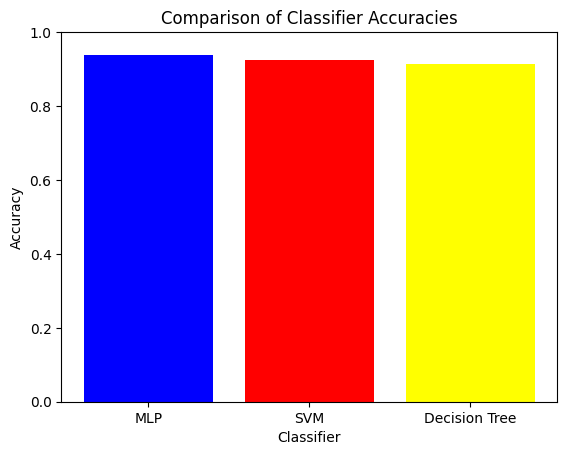

In [ ]:
classifiers = ['MLP', 'SVM', 'Decision Tree']
accuracies = [mlp_accuracy, svm_accuracy, decision_tree_accuracy]

plt.bar(classifiers, accuracies, color=['blue', 'red', 'yellow'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy percentage
plt.show()